# ЗАНЯТИЕ 6. Библиотека pandas[1]

[1] <span>&#9757;&#128578;</span> Данное занятие разработано на основе русскоязычного источника [11] и официального руководства `pandas` [12].

## Цели занятия

Получение представления о функциональности, доступных методах и объектах библиотеки `pandas`. Изучение основных принципов практической работы с ними.

## Порядок выполнения работы

Библиотека `pandas` – это удобный и быстрый инструмент для работы с данными, обладающий большим функционалом. Официальный сайт `pandas` находится по данному url: <u>https://pandas.pydata.org/</u>. `Pandas` прекрасно подходит для работы с одномерными и двумерными таблицами данных, хорошо интегрирован с внешним миром – есть возможность работать с файлами `CSV`, таблицами `Excel`, может стыковаться с языком `R`.

### Введение

Библиотека `pandas` предоставляет две структуры: `Series` и `DataFrame` для быстрой и удобной работы с данными (на самом деле их три, есть еще одна структура – `Panel`, но в данный момент она находится в статусе устаревшей и в будущем будет исключена из состава библиотеки `pandas`).

`Series` – это маркированная одномерная структура данных, ее можно представить, как таблицу с одной строкой. С `Series` можно работать двумя способами: как с обычным массивом (обращаться по номеру индекса), так и с ассоциированным массивом, когда можно использовать ключ для доступа к элементам данных. `Series` способен хранить один любой тип данных (целые числа, строки, числа с плавающей запятой, объекты `Python` и т. д.).

`DataFrame` (с англ. фрейм данных или датафрейм) – это двумерная маркированная (размеченная) структура. Идейно она очень похожа на обычную таблицу, что выражается в способе ее создания и работе с ее элементами (очень удобно использовать, например, для размещения результата SQL запроса, потому что он обычно тоже является электронной таблицей). Обычно это наиболее часто используемый объект `pandas`. Как и `Series`, `DataFrame` может хранить внутри себя много типов переменных: словари одномерных массивов, списков или серий (`Series`); `NumPy` массивы; другие `DataFrame`. При создании датафрейма дополнительно вы можете установить метки (имена) строк и столбцов.

`Panel` – представляет собой трехмерную структуру данных. О `Panel` мы больше говорить не будем, так как уже было упомянуто, что этот объект является устаревшим.

### Структура данных Series

Для того, чтобы начать работать со структурами данных из `pandas` требуется предварительно импортировать необходимые модули. Убедитесь, что нужные модули установлены на вашем компьютере.

Помимо самого `pandas` нам понадобится библиотека `numpy`, которую изучали ранее. Импортируем нужные нам библиотеки:

In [1]:
import numpy as np  
import pandas as pd  

Конструктор класса Series выглядит следующим образом:

```python
pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False) 
```
где представлены следующие принимаемые параметры:

-   `data` – массив, словарь или скалярное значение, на базе которого будет построен `Series`;

-   `index` – список меток, который будет использоваться для доступа к элементам `Series`. Длина списка должна быть равна длине `data`;

-   `dtype` – объект `numpy.dtype`, определяющий тип данных;

-   `copy` – создает копию массива данных, если параметр равен «True» в ином случае ничего не делает.

В большинстве случаев, при создании `Series`, используют только первые два параметра. Рассмотрим различные варианты как это можно сделать.

### Создание Series из списка Python

Самый простой способ создать `Series` – это передать только список `Python` в качестве единственного параметра:

In [2]:
s1 = pd.Series([1, 2, 3, 4, 5])  
print(s1)  

0    1
1    2
2    3
3    4
4    5
dtype: int64


В данном примере (представленном выше) была создана структура `Series` на базе списка. Для доступа к элементам `Series`, в данном случае, можно использовать только положительные целые числа – левый столбец чисел, начинающийся с нуля – это как раз и есть индексы элементов структуры, которые представлены в правом столбце.

Передадим в качестве второго элемента список строк (в нашем случае – это отдельные символы) – такой шаг позволит нам обращаться к элементам структуры `Series` не только по численному индексу, но и по метке, что сделает работу с таким объектом, похожей на работу со словарем.

In [3]:
s2 = pd.Series([1, 2, 3, 4, 5], ['a', 'b', 'c', 'd', 'e'])  
print(s2)  

a    1
b    2
c    3
d    4
e    5
dtype: int64


Обратите внимание на левый столбец, в нем содержатся метки, которые мы передали в качестве `index` параметра при создании структуры. Правый столбец – это по-прежнему элементы нашей структуры.

**Создание Series из ndarray массива из numpy**

Объект `ndarray` представляет собой многомерный, однородный массив элементов фиксированного размера (можно назвать его «самый обычный `NumPy` массив, с которым мы уже работали много раз»).

Создадим `Series` из пяти чисел на основе `NumPy` массива, который аналогичен списку из предыдущего раздела:

In [4]:
#сперва создадим numpy массив и выведем его тип  
ndarr = np.array([1, 2, 3, 4, 5])  
print ('тип исходного массива', type(ndarr))  
  
#Теперь создадим Series с буквенными метками.  
s3 = pd.Series(ndarr, ['a', 'b', 'c', 'd', 'e'])  
print(s3)  
print ('тип пандас массива', type(s3))  

тип исходного массива <class 'numpy.ndarray'>
a    1
b    2
c    3
d    4
e    5
dtype: int32
тип пандас массива <class 'pandas.core.series.Series'>


### Создание Series из словаря (dict)

Еще один способ создать структуру `Series` – это использовать словарь для одновременного задания меток и значений.

In [5]:
d = {'a':1, 'b':2, 'c':3}  
s4 = pd.Series(d)  
print(s4)  

a    1
b    2
c    3
dtype: int64


Ключи (`keys`) из словаря `d` станут метками структуры `s4`, а значения (`values`) словаря – значениями в структуре. Пожалуй, это наиболее удобный способ создания `Series.`

**Создание Series с использованием константы**

Рассмотрим еще один способ создания структуры. На этот раз значения в ячейках структуры будут одинаковыми, т.е. равны константе `а`, значение которой 7.

In [6]:
a = 7  
s5 = pd.Series(a, ['a', 'b', 'c'])  
print(s5)  

a    7
b    7
c    7
dtype: int64


### Работа с элементами Series

При работе с элементами типа `Series` доступно:

-   обращение по численному индексу, при таком подходе работа со структурой не отличается от работы со списками в `Python`;

-   использование меток, тогда работа с `Series` будет похожа на работу со словарем в `Python`;

-   получение слайсов (обрезки);

-   работа как с векторами: сложение, умножение вектора на число и т.п.

Описанное выше представлено в примере:

In [7]:
s6 = pd.Series([1, 2, 3, 4, 5], ['a', 'b', 'c', 'd', 'e'])

print ('0)Исходный Series s6\n', s6)
print ('1)Обращение по индексу 2(как работа со списком) s6[2]\n', s6[2])
print ('2)Обращение по метке d (как работа со словарем) s6[\'d\']\n', s6['d'])
print ('3)Получение слайса \"только первые два элемента\" s6[:2]\n', s6[:2])
print ('4)Фильтрация по условному выражению \"<=3\" s6[s6 <= 3]\n', s6[s6 <= 3])
s7 = pd.Series([10, 20, 30, 40, 50], ['a', 'b', 'c', 'd', 'e'])
print ('5)Сложение s6 с вектором s7 [10, 20, 30, 40, 50] s6 + s7\n', s6 + s7)
print ('6)Умножение s6 на константу 3 s6 * 3\n',s6 * 3)

0)Исходный Series s6
 a    1
b    2
c    3
d    4
e    5
dtype: int64
1)Обращение по индексу 2(как работа со списком) s6[2]
 3
2)Обращение по метке d (как работа со словарем) s6['d']
 4
3)Получение слайса "только первые два элемента" s6[:2]
 a    1
b    2
dtype: int64
4)Фильтрация по условному выражению "<=3" s6[s6 <= 3]
 a    1
b    2
c    3
dtype: int64
5)Сложение s6 с вектором s7 [10, 20, 30, 40, 50] s6 + s7
 a    11
b    22
c    33
d    44
e    55
dtype: int64
6)Умножение s6 на константу 3 s6 * 3
 a     3
b     6
c     9
d    12
e    15
dtype: int64


где «`\n`» – символ перевода строки на новую, а «`\`» – экранирующий символ для использованных специальных символов (кавычек).

### Структура данных DataFrame**

Если `Series` представляет собой одномерную структуру, которую можно воспринимать как таблицу с одной строкой, то `DataFrame` – это уже двумерная структура – полноценная таблица с множеством строк и столбцов.

Конструктор класса `DataFrame` выглядит так:

```python
pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
```

Он полностью аналогичен конструктору `Series`, но принимает на один параметр больше – `columns`. Этот параметр представляет собой список меток для полей (имена столбцов таблицы);

Структуру `DataFrame` можно создать на базе тех же объектов, из которых можно создать `Series`. Рассмотрим на практике различные подходы к созданию `DataFrame`.

### Создание DataFrame из словаря

Создание `DataFrame` из словаря объектов типа `Series` показано в примере ниже (дополнительно выведены метки столбцов и строк):

In [8]:
d = {"price":pd.Series([1, 2, 3], index=['v1', 'v2', 'v3']), "count": pd.Series([10, 12, 7], index=['v1', 'v2', 'v3'])}
df1 = pd.DataFrame(d)

print(df1)
print(df1.index)
print(df1.columns)

    price  count
v1      1     10
v2      2     12
v3      3      7
Index(['v1', 'v2', 'v3'], dtype='object')
Index(['price', 'count'], dtype='object')


Теперь построим `DataFrame` на базе аналогичного словаря, но созданного из элементов `ndarray`:

In [9]:
d2 = {"price":np.array([1, 2, 3]), "count": np.array([10, 12, 7])}
df2 = pd.DataFrame(d2, index=['v1', 'v2', 'v3'])
print(df2)
print(df2.index)
print(df2.columns)

    price  count
v1      1     10
v2      2     12
v3      3      7
Index(['v1', 'v2', 'v3'], dtype='object')
Index(['price', 'count'], dtype='object')


Как видно – результат аналогичен предыдущему. Вместо `ndarray` можно использовать обычный список из `Python`.

### Создание DataFrame из списка словарей

До это мы создавали `DataFrame` из словаря, элементами которого были структуры `Series`, списки и массивы, сейчас мы создадим `DataFrame` из списка, элементами которого являются словари. В примере ниже так же обратите внимание на использование метода `info()` из библиотеки `pandas`, который выводит информацию о датафрейме.

In [10]:
d3 = [{"price": 3, "count":8}, {"price": 4, "count": 11}]
df3 = pd.DataFrame(d3)
print(df3)
print(df3.info())

   price  count
0      3      8
1      4     11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   2 non-null      int64
 1   count   2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes
None


### Создание DataFrame из многомерного массива

Создать `DataFrame` можно также и из многомерных массивов, для примера пусть это будет двухмерный `ndarray` из библиотеки `numpy`:

In [11]:
nda1 = np.array([[1, 2, 3], [10, 20, 30]])  
df4 = pd.DataFrame(nda1)  
print(df4)  

    0   1   2
0   1   2   3
1  10  20  30


### Доступ к данным в структурах pandas

Основные методы для работы с объектами `DataFrame` представлены в таблице ниже (Таблица 1).

Таблица 1. Основные методы работы с `DataFrame`

<table>
<colgroup>
<col style="width: 40%" />
<col style="width: 21%" />
<col style="width: 38%" />
</colgroup>
<thead>
<tr class="header">
<th>

<strong>Операция</strong>

</th>
<th>

<strong>Синтаксис</strong>

</th>
<th>

<strong>Возвращаемый результат</strong>

</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>

Выбор столбца

</td>
<td>

df[col]

</td>
<td>

Series

</td>
</tr>
<tr class="even">
<td>

Выбор строки по метке

</td>
<td>

df.loc[label]

</td>
<td>

Series

</td>
</tr>
<tr class="odd">
<td>

Выбор строки по индексу

</td>
<td>

df.iloc[loc]

</td>
<td>

Series

</td>
</tr>
<tr class="even">
<td>

Слайс по строкам

</td>
<td>

df[0:4]

</td>
<td>

DataFrame

</td>
</tr>
<tr class="odd">
<td>

Выбор строк, отвечающих условию

</td>
<td>

df[bool_vec]

</td>
<td>

DataFrame

</td>
</tr>
</tbody>
</table>

При работе со структурами `Series` и `DataFrame` библиотеки `pandas`, как правило, используют два основных способа получения значений элементов.

Первый способ основан на использовании меток, в этом случае работа ведется через метод `loc()`. Если вы обращаетесь к отсутствующей метке, то будет сгенерировано исключение `KeyError`.

Второй способ основан на использовании целых чисел для доступа к данных, он предоставляется через метод `iloc()`. При использовании `iloc()`, если вы обращаетесь к несуществующему элементу, то будет сгенерировано исключение `IndexError`.

Оба подхода позволяют использовать:

-   метки в виде отдельных символов `[‘a’]` или чисел `[5]`;

-   список меток `[‘a’, ‘b’, ‘c’]` или ``массивы целых чисел `[0, 1, 2]`;

-   слайс меток `[‘a’:‘c’]` или целых чисел `[1:4]`;

-   условие выражения для фильтрации значений, например «`a[‘x’]==1`» или «`(a[‘x’]==1) & (a[‘y’]==10)`»;

-   Вызываемая функция с одним аргументом (будет рассмотрена позже).

В зависимости от типа используемой структуры, будет вполне логичным образом меняться набор параметров для вызываемых методов, а именно – в случае с `DataFrame` нужно передавать два индекса, а в случае с `Series` – только один. На пример для метода выборки строки по метке `loc()`:

-   для `Series`, вызов выглядит так: «`s.loc[индекс_строки]`»;

-   для `DataFrame` так: «`df.loc[индекс_строки, индекс_колонки]`».

Ниже представлен пример программной реализации описанных в таблице методов для обращения к данным библиотеки `pandas`:

In [12]:
#Для начала создадим DataFrame.
d = {"price":np.array([1, 2, 3]), "count": np.array([10, 20, 30])}
df = pd.DataFrame(d, index=['a', 'b', 'c'])

print('1)Исходный датафрейм df\n', df)
print('2)Операция  df[\'count\']: выбор столбца по метке\n', df['count'])
print('3)Операция df.loc[\'a\']: выбор строки по метке\n', df.loc['a'])
print('4)Операция df.iloc[1]: выбор строки по индексу\n', df.iloc[1])
print('5)Операция df[0:2]: slice по строкам\n', df[0:2])
print('6)Операция df[df[\'count\'] >= 20]: выбор строк, отвечающих условию\n', df[df['count'] >= 20])
print('7)Операция: выбор count из первой найденной строки,\
отвечающей составному условию. df[ (df[\'count\'] >= 20) & (df[\'price\']>2.5)][\'count\'][0]\n', df[ (df['count'] >= 20) & (df['price']>2.5)]['count'][0])

1)Исходный датафрейм df
    price  count
a      1     10
b      2     20
c      3     30
2)Операция  df['count']: выбор столбца по метке
 a    10
b    20
c    30
Name: count, dtype: int32
3)Операция df.loc['a']: выбор строки по метке
 price     1
count    10
Name: a, dtype: int32
4)Операция df.iloc[1]: выбор строки по индексу
 price     2
count    20
Name: b, dtype: int32
5)Операция df[0:2]: slice по строкам
    price  count
a      1     10
b      2     20
6)Операция df[df['count'] >= 20]: выбор строк, отвечающих условию
    price  count
b      2     20
c      3     30
7)Операция: выбор count из первой найденной строки,отвечающей составному условию. df[ (df['count'] >= 20) & (df['price']>2.5)]['count'][0]
 30


Касательно примеров 6 и 7 из кода выше отметим следующее: на практике очень часто приходится получать определенную отфильтрованную подвыборку из существующего набора данных. Например, получить все товары, скидка на которые больше пяти процентов, или выбрать из базы информацию о сотрудниках мужского пола старше 30 лет. Это очень похоже на процесс фильтрации при работе с базами данных. В данном учебном пособии ещё будут рассмотрены аналогичные действия при помощи языка `SQL`.

### Обращение через вызываемую функцию

Существует подход для обращения к элементам `pandas` объекта через callable (с англ. ­– вызываемая) функцию. Внешне это выглядит очень похоже на работу с условными выражениями и используется с той же целью – с целью фильтрации значений по какому-либо условию.

При таком подходе в квадратных скобках указывается не индекс или метка, а функция (очень часто указывается короткая лямбда функция (понятие «лямбда функция» рассматривалось в Занятии 2 в разделе «Лямбда функции»)), которая и используется для выборки элементов.

Пример получения всех строк, где цена больше или равна 2, а количество больше 25 представлен ниже:

In [13]:
#map - применяет к каждому элементу функцию
#в данном случае мы используем лямбда функцию
print (
df [
   df["price"].map(lambda price: price>= 2)
   &
   df["count"].map(lambda count: count> 25)
   ]
)

   price  count
c      3     30


### Использование атрибутов для доступа к данным

Для доступа к данным можно использовать атрибуты структур, в качестве которых выступают метки. Начнем со структуры `Series`. Для доступа к элементу через атрибут необходимо указать его через точку после имени структуры:

In [14]:
s = pd.Series([10, 20, 30, 40, 50], ['a', 'b', 'c', 'd', 'e'])  
print (s,'\n')  
print (s.a)  
print (s.b)  

a    10
b    20
c    30
d    40
e    50
dtype: int64 

10
20


Т.к. структура `s` имеет метки `‘a’, ‘b’, ‘c’, ‘d’, ‘e’`, то для доступа к элементу с меткой `‘a’` мы может использовать синтаксис «`s.a`». Этот же подход можно применить для объекта типа `DataFrame`. Например, для доступа к столбцу `‘price’`:

In [15]:
d = {"price":[1, 2, 3], "count": [10, 20, 30], "percent": [24, 51, 71]}
df = pd.DataFrame(d, index=['a', 'b', 'c'])
print (df,'\n')
print (df.price)

   price  count  percent
a      1     10       24
b      2     20       51
c      3     30       71 

a    1
b    2
c    3
Name: price, dtype: int64


**Получение случайного набора из структур pandas**

Библиотека `pandas` предоставляет возможность получить случайный набор данных из уже существующей структуры. Такой функционал доступен как для `Series`, так и для `DataFrame`, и реализуется при помощи метода `sample()`, который и предоставляет случайную выборку.

Для того, чтобы выбрать случайным образом один, `n` или некоторую долю элементов, можно воспользоваться следующим синтаксисом (на примере `Series`):

In [16]:
s = pd.Series([10, 20, 30, 40, 50], ['a', 'b', 'c', 'd', 'e'])
print('0)Исходный series s\n', s)
print('1)выбрать 1 случайное значение s.sample()\n', s.sample())
print('2)выбрать 3 случайных значений s.sample(n=3)\n', s.sample(n=3))
print('3)выбрать долю от общего числа объектов в структуре s.sample(frac=0.3)\n', s.sample(frac=0.3))

0)Исходный series s
 a    10
b    20
c    30
d    40
e    50
dtype: int64
1)выбрать 1 случайное значение s.sample()
 a    10
dtype: int64
2)выбрать 3 случайных значений s.sample(n=3)
 d    40
a    10
b    20
dtype: int64
3)выбрать долю от общего числа объектов в структуре s.sample(frac=0.3)
 d    40
a    10
dtype: int64


Очень интересной особенностью является то, что мы можем передать вектор весов вероятностей выборки, длина которого должна быть равна количеству элементов в структуре. Сумма весов должна быть равна единице, а вес, в данном случае – это вероятность появления элемента в выборке.

Давайте сформируем вектор вероятностей для строк `DataFrame` и сделаем выборку из трех элементов:

In [17]:
d = {"price":[1, 2, 3, 5, 6], "count": [10, 20, 30, 40, 50], "percent": [24, 51, 71, 25, 42]}
df = pd.DataFrame(d)
w = [0.1, 0.2, 0.5, 0.1, 0.1]

print ('0)Исходный датафрейм df\n', df)
print ('1)Выборка трех строк на основе весов \n\
df.sample(n = 3, weights=[0.1, 0.2, 0.5, 0.1, 0.1])\n',
df.sample(n = 3, weights=w))

0)Исходный датафрейм df
    price  count  percent
0      1     10       24
1      2     20       51
2      3     30       71
3      5     40       25
4      6     50       42
1)Выборка трех строк на основе весов 
df.sample(n = 3, weights=[0.1, 0.2, 0.5, 0.1, 0.1])
    price  count  percent
2      3     30       71
4      6     50       42
0      1     10       24


При работе с `DataFrame` можно указывать ось (ось 0 – строки, ось 1 – столбцы):

In [18]:
print ('0)df.sample(axis=1)\n', df.sample(axis=1))
print ('1) df.sample(n=2, axis=0)\n', df.sample(n=2, axis=0))

0)df.sample(axis=1)
    price
0      1
1      2
2      3
3      5
4      6
1) df.sample(n=2, axis=0)
    price  count  percent
0      1     10       24
1      2     20       51


### Добавление элементов в структуры

Увеличение размера структуры – т.е. добавление новых, дополнительных, элементов – это довольно распространенная задача. Добавление нового элемента в `Series` показано ниже.

In [19]:
s = pd.Series([10, 20, 30, 40, 50], ['a', 'b', 'c', 'd', 'e'])
print ('0)Исходный Series s\n', s)
s['f'] = 60
print ('1) Добавили s[\'f\'] = 60\n', s)

0)Исходный Series s
 a    10
b    20
c    30
d    40
e    50
dtype: int64
1) Добавили s['f'] = 60
 a    10
b    20
c    30
d    40
e    50
f    60
dtype: int64


Добавлять столбцы и строки в структуру `DataFrame` можно по новой метке/индексу (ниже продемонстрированы различные варианты). Для удаления строк или столбцов существует метод `drop()`:

In [20]:
d = {"price":[1, 2, 3], "count": [10, 20, 30], "percent": [24, 51, 71]}
df = pd.DataFrame(d)

print ('0)Исходный DataFrame df\n', df)

#добавление новой колонки
df['value'] = [3, 14, 7]
print ('1) Добавили столбец value\n', df)

#добавление новой колонки
my_column = pd.DataFrame({'new_column': [111, 222, 333]})
df=df.assign(new_column =my_column)
print ('2) Добавили столбец new_column\n', df)

#добавление новой строки
df.loc[3] = ['11', '22', '33', '44', np.NaN]
print ('3) Добавили строку  11 22 33 44 NaN\n', df)

#добавление новой строки
my_row = {'price': '1', 'count' : '2', 'percent' : '3'}
#ignore_index - чтобы продолжилась индексация т.е. присвоится 5ый индекс
df=df.append(my_row, ignore_index=True)
print ('4) Добавили строку  1 2 3 NaN NaN\n', df)

#удаление по осям
df=df.drop(['value', 'new_column'], axis=1)
print ('5) Удалили колонки value и new_column\n', df)

0)Исходный DataFrame df
    price  count  percent
0      1     10       24
1      2     20       51
2      3     30       71
1) Добавили столбец value
    price  count  percent  value
0      1     10       24      3
1      2     20       51     14
2      3     30       71      7
2) Добавили столбец new_column
    price  count  percent  value  new_column
0      1     10       24      3         111
1      2     20       51     14         222
2      3     30       71      7         333
3) Добавили строку  11 22 33 44 NaN
   price count percent value  new_column
0     1    10      24     3       111.0
1     2    20      51    14       222.0
2     3    30      71     7       333.0
3    11    22      33    44         NaN
4) Добавили строку  1 2 3 NaN NaN
   price count percent value  new_column
0     1    10      24     3       111.0
1     2    20      51    14       222.0
2     3    30      71     7       333.0
3    11    22      33    44         NaN
4     1     2       3   NaN         NaN


### Вывод значений на основе таблицы True/False

Если вы построите структуру той же размерности, что и ваша структура с данными, но вместо данных у вас будут значения `True/False`, то вы можете использовать эту структуру для маскировки значений в исходной структуре (почти как мы делали с `NumPy`, только тут мы не прячем значения, а заменяем на `NaN`).

Конечно, это всего лишь подобие маскировки в сравнении с полноценной маскировкой в `NumPy`, потому что помеченные как `NaN` (англ. Not-a-Number, «не число») значения все равно будут существовать и использоваться при вычислениях.

Рассмотрим пример. В `pandas` есть метод `isin()`, который проверяет содержится ли определенное значение или значения в элементах нашей структуры. В примере ниже, если элемент имеет значение, равное любому из `1,2,3,20`, то в представлении на месте этого элемента записывается `True`, а если значение другое, то `False`.

In [21]:
df = pd.DataFrame({"price":[1, 2, 3], "count": [10, 20, 30], "percent": [24, 51, 71]})
print ('0)Исходный DataFrame df\n', df)
print ('1)df.isin([1, 2, 3, 20])\n', df.isin([1, 2, 3, 20]))
print ('2)df [df.isin([1, 2, 3, 20])])\n', df [df.isin([1, 2, 3, 20])])

0)Исходный DataFrame df
    price  count  percent
0      1     10       24
1      2     20       51
2      3     30       71
1)df.isin([1, 2, 3, 20])
    price  count  percent
0   True  False    False
1   True   True    False
2   True  False    False
2)df [df.isin([1, 2, 3, 20])])
    price  count  percent
0      1    NaN      NaN
1      2   20.0      NaN
2      3    NaN      NaN


Тем самым, в пункте 2 примера мы получили новую `pandas` структуру, точно такого же размера, как и исходная. Используя её (см. пункт 3 в примере), мы можем вывести отфильтрованные значения, а те значения, которые не прошли фильтрацию, будут выведены как `NaN` (т.е. пустые).

Для решения этой же задачи более простым путём можно использовать готовый `pandas` метод `mask()`. Он может не прошедшие фильтрацию значения не только устанавливать в `NaN`, но и установить им какое-либо конкретное значение.

In [22]:
print ('0)Исходный DataFrame df\n', df)
print ('1)df.mask(df[\'count\'] > 21, \'Не подходит\')\n', df.mask( df['count']   > 21, 'Не подходит'))

0)Исходный DataFrame df
    price  count  percent
0      1     10       24
1      2     20       51
2      3     30       71
1)df.mask(df['count'] > 21, 'Не подходит')
          price        count      percent
0            1           10           24
1            2           20           51
2  Не подходит  Не подходит  Не подходит


### Pandas и отсутствующие данные

Обратим внимание, что в документации по библиотеке `pandas` есть целый раздел, посвященный данной тематике. Для наших экспериментов создадим структуру `DataFrame`, которая будет содержать пропуски.

Сперва импортируем необходимые нам библиотеки:

In [23]:
import pandas as pd  
from io import StringIO  

Модуль `StringIO` позволяет работать со строкой как с файловым объектом. Все операции с файловым объектом производится в оперативной памяти (т.е. значительно быстрее чем при работе с реальным файлом, расположенном на накопителе). Мы используем этот модуль, чтобы продемонстрировать, как будто бы мы хотели открыть `csv` файл, хранящий набор данных, например, считанных с датчиков.

`CSV` (от англ. Comma-Separated Values – значения, разделённые запятыми) – это один из наиболее простых и распространенных форматов хранения данных, в котором элементы отделяются друг от друга запятыми. Очень часто различные наборы данных мы получаем именно в `CSV` формате (в него можно экспортировать данные из `Exel`, баз данных и почти откуда угодно, потому что это один из самых простых форматов). В том числе многие наборы данных, которые можно скачать в сети Интернет в целях обучения, представлены именно в этом формате.

`Pandas` «умеет» считывать содержимое из реального `CSV` файла и записывать его в `DataFrame.` Мы бы могли просто создать файл на накопителе через обычный блокнот, а затем открыть его при помощи `pandas`, но в целях разнообразия и повышения кругозора читателя данного учебного пособия, сделано именно с использованием виртуального файла. Если бы мы использовали реальный файл, то он бы выглядел представленным на рисунке ниже способом (Рис. 1).

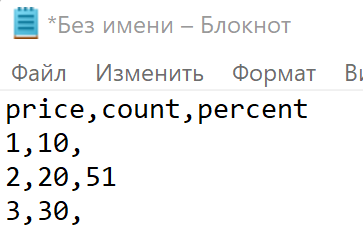

Рис. 1. Создание файла в блокноте `Windows`

Сперва мы создадим строку, которую передадим в функцию `StringIO()`, которая в свою очередь вернет виртуальный файл, который далее сможет открыть `pandas`. В итоге, мы в переменной `df` имеем все значения, которые были прочитаны из нашего виртуального файла:

In [24]:
data = 'price,count,percent\n1,10,\n2,20,51\n3,30,'
df = pd.read_csv(StringIO(data))
print (df)

   price  count  percent
0      1     10      NaN
1      2     20     51.0
2      3     30      NaN


Полученный объект `df` – это `DataFrame` с пропусками (`NaN` – англ. Not-a-Number, «не число»). В нашем примере, у объектов с индексами 0 и 2 отсутствуют данные в поле `percent`. Отсутствующие данные помечаются как `NaN`. Добавим к существующей структуре еще один объект (запись), у которого будет отсутствовать значение в поле `count` (`None` – c англ. ничто, т.е. пустое значение).

`NaN` – это тип для отсутствующих числовых данных из библиотеки `NumPy` (т.е. не является стандартным, как `float` или `int`), на основе которой и работает `pandas`. В отличие от `None` (является стандартным для `Python`), `NaN` – это число, хоть и без установленного значения. `NaN` – это математический тип пустоты. Думайте о нем так же, как о понятии «бесконечность» – она, как и `NaN`, «теоретическое понятие» в математике. А `None` – это любое пустое значение, не обязательно число.

In [25]:
df.loc[3] = {'price':4, 'count':None, 'percent':26.3}  
print (df)  

   price count  percent
0      1    10      NaN
1      2    20     51.0
2      3    30      NaN
3      4  None     26.3


Мы могли вместо «`‘count’:None`» написать «`‘count’:np.NaN`» для красоты и однородности и это было бы более правильно, и все работало бы точно так же, но тогда бы вы возможно никогда не узнали про существование типа `None`.

Для начала обратимся к методу `isnull()`из библиотеки `pandas`, который позволяет быстро определить наличие элементов `NaN` в структурах:

In [26]:
pd.isnull(df)  

,price,count,percent
0,False,False,True
1,False,False,False
2,False,False,True
3,False,True,False


Таким образом мы получаем таблицу того же размера, но на месте реальных данных в ней находятся логические переменные, которые принимают значение `False`, если значение поля у объекта есть, или `True`, если значение в данном поле отсутствует. Как видим, что `np.NaN` (`np` – с таким именем импортирован `NumPy`), что `None` – все пустоты метод `isnull()` нам пометил «`True`». В дополнение к этому можно посмотреть подробную информацию об объекте (датафрейме), для этого можно воспользоваться методом `info()`.

In [27]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    4 non-null      int64  
 1   count    3 non-null      object 
 2   percent  2 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 128.0+ bytes


В нашем примере видно, что объект `df` имеет три столбца (`count`, `percent` и `price`), при этом в столбце `price` все объекты значимы – т.е. не `NaN`, в столбце `count` – один пустой объект, в поле `percent` – два пустых объекта.

Обратите внимание, что тип (`Dtype)` столбца `count` показывается как `object`. Это потому, что мы при добавлении одной новой строки использовали `None` вместо `np.NaN.` И из-за этой одной строки весь столбец принял «обобщенный» тип «объект» («`object`»). Написали бы мы именно «математическую пустоту» `np.NaN`, то тип бы отображался корректно. Было бы более правильно написать `np.NaN`.

Можно воспользоваться следующим подходом для получения количества `NaN` элементов в записях:

In [28]:
df.isnull().sum()  

price      0
count      1
percent    2
dtype: int64

### Замена отсутствующих данных

Отсутствующие данные объектов можно заменить на конкретные числовые значения, для этого можно использовать метод `fillna()`. Для экспериментов будем использовать структуру `df`, созданную ранее.

In [29]:
print (df)  
print (df.fillna(0))  

   price count  percent
0      1    10      NaN
1      2    20     51.0
2      3    30      NaN
3      4  None     26.3
   price  count  percent
0      1     10      0.0
1      2     20     51.0
2      3     30      0.0
3      4      0     26.3


Этот метод по умолчанию не изменяет исходную структуру, он возвращает структуру `DataFrame`, созданную на базе существующей, с заменой пустых значений на те, что переданы в метод в качестве аргумента.

Не всегда целесообразно заменять отсутствующие данные нулями, как показано выше. Иногда недостающие данные можно заполнить средним значением по столбцу:

In [30]:
df=df.fillna(df.mean())  
print (df)  

   price  count  percent
0      1   10.0    38.65
1      2   20.0    51.00
2      3   30.0    38.65
3      4   20.0    26.30


В зависимости от задачи используется тот или иной метод заполнения отсутствующих элементов, это может быть нулевое значение, математическое ожидание, медиана и т.п. Для замены `NaN` элементов на конкретные значения, можно использовать интерполяцию, которая реализована в методе `interpolate()` и другие доступные методы.

### Удаление объектов/столбцов с отсутствующими данными

Довольно часто используемый подход при работе с отсутствующими данными – это удаление записей (строк) или полей (столбцов), в которых встречаются пропуски. Для того, чтобы удалить все объекты, которые содержат значения `NaN` воспользуйтесь методом `dropna()` без аргументов:

In [31]:
df.dropna()  

,price,count,percent
0,1,10.0,38.65
1,2,20.0,51.00
2,3,30.0,38.65
3,4,20.0,26.30


Вместо записей, можно удалить поля, для этого нужно вызвать метод `dropna()` с аргументом `axis=1`:

In [32]:
df.dropna(axis=1)  

,price,count,percent
0,1,10.0,38.65
1,2,20.0,51.00
2,3,30.0,38.65
3,4,20.0,26.30


`Pandas` позволяет задать порог на количество не-`NaN` элементов. В приведенном ниже примере будут удалены все столбцы, в которых количество не-`NaN` элементов меньше трех:

In [33]:
df.dropna(axis = 1, thresh=3)  

,price,count,percent
0,1,10.0,38.65
1,2,20.0,51.00
2,3,30.0,38.65
3,4,20.0,26.30


## Контрольные задания и вопросы

1.  `Pandas` – основные сведения. Сравнение с функциональностью `NumPy`.

2.  Приведите пример `Series` и попробуйте: выводить на экран, добавлять элементы, изменять значения.

3.  Повторите пункт 2 для объекта `DataFrame`.

4.  Попробуйте открыть при помощи `pandas` реальный `CSV` файл с пропусками или некорректными значениями и исправить их.